# Handwritten digit identification for MNIST dataset

### Multiclass classification using Random Forest and Support Vector Machine classifiers

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

## Loading the Data


In [3]:
mnist = fetch_mldata('MNIST (original)')

In [4]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [5]:
X, y = mnist["data"], mnist["target"]

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y,
    shuffle = True,random_state=144)

In [9]:
X_train.shape

(52500, 784)

In [10]:
y_train.shape

(52500,)

In [11]:
X_test.shape

(17500, 784)

In [12]:
y_test.shape

(17500,)

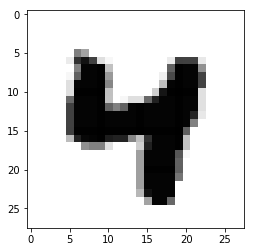

In [13]:
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[25001]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary)

## Random Forest Classifier

In [14]:
rf = RandomForestClassifier(n_jobs=-1,n_estimators=100)

In [15]:
rf = rf.fit(X_train,y_train)

In [16]:
rf.score(X_test, y_test)

0.9671428571428572

In [17]:
pred_rf = rf.predict(X_test)

In [18]:
confusion = confusion_matrix(y_test, pred_rf)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[1708    1    4    0    0    4    2    0    6    1]
 [   0 1936    7    4    4    2    4    4    6    2]
 [   5    2 1704    5    9    0    2    9   11    1]
 [   5    2   21 1693    1   16    2   18   18    9]
 [   2    1    1    1 1659    0    9    3    5   25]
 [   4    1    1   20    2 1519   13    1   10    7]
 [  10    4    3    0    3   12 1681    0    6    0]
 [   1   12   17    3   11    0    0 1762    1   16]
 [   1    5   12   18   10   13    4    2 1626   15]
 [   5    5    6   20   21    8    1   23   14 1637]]


## Support Vector Machine Classifier

In [19]:
svm_model = svm.LinearSVC(C=1.0)
svm_model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [20]:
print("Training set score: {:.3f}".format(svm_model.score(X_train, y_train)))
print("Test set score: {:.3f}".format(svm_model.score(X_test, y_test)))

Training set score: 0.867
Test set score: 0.850


In [21]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
svm_model = svm.LinearSVC(C=1.0)
svm_model.fit(X_train_scaled, y_train)
print("Train set accuracy: {:.2f}".format(svm_model.score(X_train_scaled, y_train)))
print("Test set accuracy: {:.2f}".format(svm_model.score(X_test_scaled, y_test)))

Train set accuracy: 0.93
Test set accuracy: 0.90


In [23]:
pred_svm = svm_model.predict(X_test_scaled)

In [24]:
f1_score(y_test, pred_svm,average='macro')

0.9012463495507367

In [25]:
confusion = confusion_matrix(y_test, pred_svm)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[1672    0    4    4    3    8   18    3   13    1]
 [   0 1911    8   10    3    9    1    4   19    4]
 [   8   23 1528   32   21   11   26   27   60   12]
 [  16   10   52 1551    6   59    7   17   40   27]
 [   1    4   18    6 1561    4   19    8   16   69]
 [  19    3   19   72   27 1331   28   10   48   21]
 [  10    8   24    2   19   26 1609    2   19    0]
 [   8   15   18   13   23    6    3 1669    7   61]
 [  12   38   23   64   15   55   19    8 1435   37]
 [   6   11   12   33   59   13    0   60   17 1529]]
